In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from kmodes.kmodes import KModes
import numpy as np

In [2]:
from data_quality import cargue_datasets_c
casos, hurto_tp, mede_victimas, compar = cargue_datasets_c()

In [3]:
casos_b=casos
hurto_tp_b=hurto_tp
mede_victimas_b=mede_victimas
compar_b=compar

from data_quality import casos_c
casos=casos_c(casos)

from data_quality import hurto_tp_c
hurto_tp= hurto_tp_c(hurto_tp)

from data_quality import medevic_c
mede_victimas = medevic_c(mede_victimas)

In [4]:
df = pd.concat([casos_b, hurto_tp_b], axis=0)
df = df.reset_index(drop=True)

In [6]:
columnas_a_eliminar = ['Fecha']

df.drop(columnas_a_eliminar, axis=1, inplace=True)

In [7]:
km = KModes(n_clusters=5, init="Huang", n_init=10,verbose=1)

In [8]:
df.fillna("Desconocido", inplace = True)

In [9]:
df=df.astype(str)

In [10]:
clusters= km.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11229, cost: 125592.0
Run 1, iteration: 2/100, moves: 2130, cost: 125072.0
Run 1, iteration: 3/100, moves: 0, cost: 125072.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7085, cost: 139377.0
Run 2, iteration: 2/100, moves: 1194, cost: 139377.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5406, cost: 139055.0
Run 3, iteration: 2/100, moves: 85, cost: 139055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8890, cost: 139934.0
Run 4, iteration: 2/100, moves: 518, cost: 139934.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 11308, cost: 139874.0
Run 5, iteration: 2/100, moves: 2826, cost: 138059.0
Run 5, iteration: 3/1

In [11]:
print("Centroides de los clusters")
print(km.cluster_centroids_)
print("Clusters asignados a cada punto de datos:")
print(clusters)

Centroides de los clusters
[['2017' 'Homicidio' '13.0' '2.0' 'Desconocido' 'Desconocido'
  'Desconocido' 'Desconocido' 'Desconocido' 'Desconocido' 'Desconocido']
 ['2019' 'Sin dato' '10.0' 'Desconocido' 'Mujer' '25.0' 'Soltero(a)'
  'Autobus' 'Cosquilleo' 'Bus de servicio público' 'Celular']
 ['2017' 'Sin dato' '10.0' 'Desconocido' 'Hombre' '28.0' 'Soltero(a)'
  'Taxi' 'Atraco' 'Vía pública' 'Peso']
 ['2018' 'De celular' '10.0' 'Desconocido' 'Hombre' '35.0' 'Soltero(a)'
  'Taxi' 'Atraco' 'Bus de servicio público' 'Celular']
 ['2022' 'Sin dato' '10.0' 'Desconocido' 'Hombre' '24.0' 'Soltero(a)'
  'Metro' 'Cosquilleo' 'Estación del Metro' 'Celular']]
Clusters asignados a cada punto de datos:
[0 0 0 ... 2 4 4]


In [16]:
import matplotlib.pyplot as plt
from prince import MCA

In [20]:
df.columns.tolist()

['Año',
 'Conducta',
 'Comuna',
 'Cantidad_casos',
 'Sexo',
 'Edad',
 'Estado_civil',
 'Transporte',
 'Modalidad',
 'Lugar',
 'Bien']

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11012, cost: 143840.0
Run 1, iteration: 2/100, moves: 3918, cost: 142420.0
Run 1, iteration: 3/100, moves: 102, cost: 142420.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11342, cost: 142332.0
Run 2, iteration: 2/100, moves: 865, cost: 142332.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6389, cost: 150328.0
Run 3, iteration: 2/100, moves: 0, cost: 150328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6344, cost: 153079.0
Run 4, iteration: 2/100, moves: 39, cost: 153079.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6330, cost: 149335.0
Run 5, iteration: 2/100, moves: 5867, cost: 142371.0
Run 5, iteration: 3/10

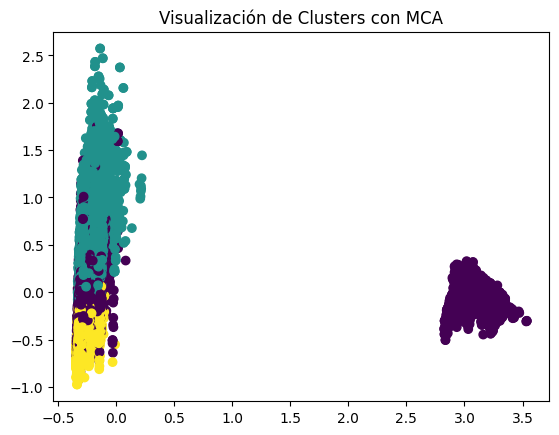

In [19]:
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

# Ajustar el modelo a los datos
clusters = km.fit_predict(df)

# Aplicar MCA para visualizar los clusters en un espacio de menor dimensión
mca = MCA()
data_mca = mca.fit_transform(df)

# Graficar los clusters en un gráfico bidimensional
plt.scatter(data_mca.values[:, 0], data_mca.values[:, 1], c=clusters, cmap='viridis')
plt.title('Visualización de Clusters con MCA')
plt.show()